In [3]:
import xarray as xr

In [11]:
fps = """
/nwp/danra/data/subset/danra.heightAboveGround.t_100_r_100_u_100_v_100.19980822T000000+0000-19980905T000000+0000.zarr /nwp/danra/data/subset/danra.heightAboveGround.t_100_r_100_u_100_v_100.19980905T000000+0000-19980919T000000+0000.zarr /nwp/danra/data/subset/danra.heightAboveGround.t_100_r_100_u_100_v_100.19980919T000000+0000-19981003T000000+0000.zarr /nwp/danra/data/subset/danra.heightAboveGround.t_100_r_100_u_100_v_100.19981003T000000+0000-19981017T000000+0000.zarr /nwp/danra/data/subset/danra.heightAboveGround.t_100_r_100_u_100_v_100.19981017T000000+0000-19981031T000000+0000.zarr /nwp/danra/data/subset/danra.heightAboveGround.t_100_r_100_u_100_v_100.19981031T000000+0000-19981114T000000+0000.zarr /nwp/danra/data/subset/danra.heightAboveGround.t_100_r_100_u_100_v_100.19981114T000000+0000-19981128T000000+0000.zarr /nwp/danra/data/subset/danra.heightAboveGround.t_100_r_100_u_100_v_100.19981128T000000+0000-19981212T000000+0000.zarr /nwp/danra/data/subset/danra.heightAboveGround.t_100_r_100_u_100_v_100.19981212T000000+0000-19981226T000000+0000.zarr /nwp/danra/data/subset/danra.heightAboveGround.t_100_r_100_u_100_v_100.19981226T000000+0000-19990109T000000+0000.zarr /nwp/danra/data/subset/danra.heightAboveGround.t_100_r_100_u_100_v_100.19990109T000000+0000-19990123T000000+0000.zarr /nwp/danra/data/subset/danra.heightAboveGround.t_100_r_100_u_100_v_100.19990123T000000+0000-19990206T000000+0000.zarr /nwp/danra/data/subset/danra.heightAboveGround.t_100_r_100_u_100_v_100.19990206T000000+0000-19990220T000000+0000.zarr
""".split()
len(fps), fps[0]

(13,
 '/nwp/danra/data/subset/danra.heightAboveGround.t_100_r_100_u_100_v_100.19980822T000000+0000-19980905T000000+0000.zarr')

In [12]:
datasets = []
for fp in fps:
    ds = xr.open_zarr(fp)
    datasets.append(ds)

In [13]:
ds = xr.concat(datasets, dim="time")

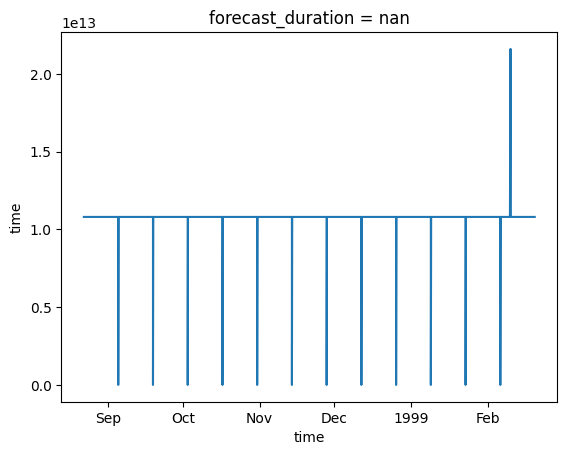

In [14]:
ds.time.diff(dim="time").plot()

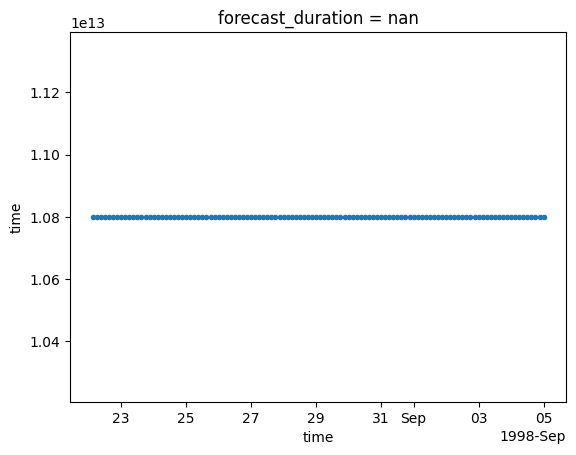

In [15]:
datasets[0].time.diff(dim="time").plot(marker=".")

In [16]:
datasets[0].isel(time=-1).time, datasets[1].isel(time=0).time

(<xarray.DataArray 'time' ()>
 array('1998-09-05T00:00:00.000000000', dtype='datetime64[ns]')
 Coordinates:
     forecast_duration  float64 ...
     time               datetime64[ns] 1998-09-05,
 <xarray.DataArray 'time' ()>
 array('1998-09-05T00:00:00.000000000', dtype='datetime64[ns]')
 Coordinates:
     forecast_duration  float64 ...
     time               datetime64[ns] 1998-09-05)

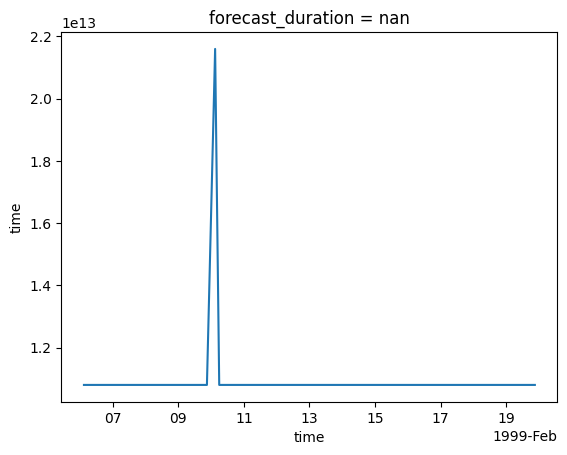

In [17]:
datasets[-1].time.diff(dim="time").plot()

In [18]:
fps[-1]

'/nwp/danra/data/subset/danra.heightAboveGround.t_100_r_100_u_100_v_100.19990206T000000+0000-19990220T000000+0000.zarr'

In [20]:
datasets[-1].sel(time=slice("1999-02-09", "1999-02-11")).time

<xarray.DataArray 'time' (time: 23)>
array(['1999-02-09T00:00:00.000000000', '1999-02-09T03:00:00.000000000',
       '1999-02-09T06:00:00.000000000', '1999-02-09T09:00:00.000000000',
       '1999-02-09T12:00:00.000000000', '1999-02-09T15:00:00.000000000',
       '1999-02-09T18:00:00.000000000', '1999-02-09T21:00:00.000000000',
       '1999-02-10T03:00:00.000000000', '1999-02-10T06:00:00.000000000',
       '1999-02-10T09:00:00.000000000', '1999-02-10T12:00:00.000000000',
       '1999-02-10T15:00:00.000000000', '1999-02-10T18:00:00.000000000',
       '1999-02-10T21:00:00.000000000', '1999-02-11T00:00:00.000000000',
       '1999-02-11T03:00:00.000000000', '1999-02-11T06:00:00.000000000',
       '1999-02-11T09:00:00.000000000', '1999-02-11T12:00:00.000000000',
       '1999-02-11T15:00:00.000000000', '1999-02-11T18:00:00.000000000',
       '1999-02-11T21:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
    forecast_duration  float64 ...
  * time               (time) datetime64[ns] 1999-02-09 ... 1999-02-11T21:00:00